In [1]:
import numpy as np
import pandas as pd
import matplotlib
import IPython
DATA_PATH = "MADReSS_Challenge_2022/data/train/"
SAMPLES = "MADReSS_Challenge_2022/data/sample/"

In [2]:
# load all features
training_df = pd.read_csv("MADReSS_Challenge_2022/data/training-groundtruth.csv")

In [180]:
# here the features are the means and the stds of the file
flattened_feats = []
for fname in training_df["adressfname"]:
    means = pd.read_csv("pyAudioFeatures/%s.csv"%(fname)).mean().add_suffix("mean")
#     stds = pd.read_csv("pyAudioFeatures/%s.csv"%(fname)).std().add_suffix("std")
#     feats = pd.concat([means,stds])
    feats = means
    feats["fname"] = fname
    flattened_feats.append(feats)
flattened_feats = pd.DataFrame(flattened_feats)
flattened_feats

,zcrmean,energymean,energy_entropymean,spectral_centroidmean,spectral_spreadmean,spectral_entropymean,spectral_fluxmean,spectral_rolloffmean,mfcc_1mean,mfcc_2mean,...,delta chroma_5mean,delta chroma_6mean,delta chroma_7mean,delta chroma_8mean,delta chroma_9mean,delta chroma_10mean,delta chroma_11mean,delta chroma_12mean,delta chroma_stdmean,fname
0,0.048794,0.005485,2.533611,0.101507,0.147451,0.184111,0.001663,0.041034,-25.350983,3.125117,...,-0.000002,-2.937727e-05,-1.461423e-07,0.000034,5.612216e-05,0.000021,5.814686e-06,1.354871e-07,2.821675e-05,adrso002
1,0.044432,0.011529,2.472201,0.088199,0.141110,0.062356,0.001363,0.026510,-23.769075,3.409265,...,0.000002,3.860679e-05,-7.654574e-06,0.000012,-6.322194e-05,-0.000004,-5.944757e-05,-3.863087e-05,-2.353447e-05,adrso003
2,0.046957,0.012607,2.625942,0.120539,0.156420,0.218077,0.001017,0.042253,-24.312607,3.021969,...,-0.000007,1.067294e-04,-4.035575e-05,-0.000069,-2.238378e-05,-0.000070,-2.783714e-05,-1.768720e-05,1.683796e-05,adrso004
3,0.046704,0.002287,2.573206,0.119546,0.161507,0.210858,0.007507,0.043910,-26.172160,2.919440,...,-0.000004,-1.782289e-06,-1.075661e-05,0.000002,-7.427384e-07,-0.000020,-5.359927e-06,-6.571084e-06,-2.931928e-07,adrso005
4,0.049657,0.010619,2.601141,0.119435,0.159233,0.193907,0.001151,0.045617,-24.107878,3.069109,...,-0.000009,-2.882021e-06,-1.100062e-06,-0.000006,-6.797874e-06,-0.000003,2.630755e-05,5.174994e-06,1.023212e-04,adrso006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.029316,0.018567,2.373286,0.065690,0.114633,0.041038,0.001697,0.029882,-24.227100,3.286008,...,0.000034,3.373730e-04,1.049835e-05,-0.000294,7.277617e-05,0.000010,6.300814e-05,-5.827066e-06,2.583119e-05,adrso313
233,0.048314,0.011813,2.539201,0.090485,0.138228,0.152493,0.001214,0.037737,-23.612093,3.220772,...,-0.000017,-8.287316e-07,-1.611297e-05,0.000004,-1.283266e-05,0.000007,-7.759432e-08,-2.193996e-05,-7.817698e-05,adrso314
234,0.104997,0.002979,2.790357,0.180482,0.213372,0.406388,0.000574,0.084307,-25.552140,2.702232,...,-0.000021,-6.765927e-06,4.584964e-06,0.000002,-1.102845e-05,0.000017,9.309409e-06,3.001071e-06,-6.819540e-06,adrso315
235,0.048744,0.011976,2.600717,0.099182,0.148702,0.161168,0.000945,0.042390,-24.627997,3.097573,...,0.000016,3.266935e-06,-1.011850e-06,0.000050,1.450126e-05,0.000016,2.577446e-07,-2.786763e-06,7.411056e-06,adrso316


In [194]:
final_feats = training_df[["adressfname","dx","age","gender"]].merge(flattened_feats,left_on="adressfname",right_on="fname",)
final_feats = final_feats.drop(columns=["adressfname","fname"])
final_feats

,dx,age,gender,zcrmean,energymean,energy_entropymean,spectral_centroidmean,spectral_spreadmean,spectral_entropymean,spectral_fluxmean,...,delta chroma_4mean,delta chroma_5mean,delta chroma_6mean,delta chroma_7mean,delta chroma_8mean,delta chroma_9mean,delta chroma_10mean,delta chroma_11mean,delta chroma_12mean,delta chroma_stdmean
0,Control,70,female,0.048794,0.005485,2.533611,0.101507,0.147451,0.184111,0.001663,...,-1.682114e-06,-0.000002,-2.937727e-05,-1.461423e-07,0.000034,5.612216e-05,0.000021,5.814686e-06,1.354871e-07,2.821675e-05
1,Control,72,female,0.044432,0.011529,2.472201,0.088199,0.141110,0.062356,0.001363,...,9.842085e-07,0.000002,3.860679e-05,-7.654574e-06,0.000012,-6.322194e-05,-0.000004,-5.944757e-05,-3.863087e-05,-2.353447e-05
2,Control,74,female,0.046957,0.012607,2.625942,0.120539,0.156420,0.218077,0.001017,...,-2.616079e-05,-0.000007,1.067294e-04,-4.035575e-05,-0.000069,-2.238378e-05,-0.000070,-2.783714e-05,-1.768720e-05,1.683796e-05
3,Control,67,female,0.046704,0.002287,2.573206,0.119546,0.161507,0.210858,0.007507,...,-1.811484e-06,-0.000004,-1.782289e-06,-1.075661e-05,0.000002,-7.427384e-07,-0.000020,-5.359927e-06,-6.571084e-06,-2.931928e-07
4,Control,65,female,0.049657,0.010619,2.601141,0.119435,0.159233,0.193907,0.001151,...,-2.168268e-06,-0.000009,-2.882021e-06,-1.100062e-06,-0.000006,-6.797874e-06,-0.000003,2.630755e-05,5.174994e-06,1.023212e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Control,63,female,0.029316,0.018567,2.373286,0.065690,0.114633,0.041038,0.001697,...,9.548443e-05,0.000034,3.373730e-04,1.049835e-05,-0.000294,7.277617e-05,0.000010,6.300814e-05,-5.827066e-06,2.583119e-05
233,Control,61,female,0.048314,0.011813,2.539201,0.090485,0.138228,0.152493,0.001214,...,-6.753647e-07,-0.000017,-8.287316e-07,-1.611297e-05,0.000004,-1.283266e-05,0.000007,-7.759432e-08,-2.193996e-05,-7.817698e-05
234,Control,58,male,0.104997,0.002979,2.790357,0.180482,0.213372,0.406388,0.000574,...,6.012612e-06,-0.000021,-6.765927e-06,4.584964e-06,0.000002,-1.102845e-05,0.000017,9.309409e-06,3.001071e-06,-6.819540e-06
235,Control,56,male,0.048744,0.011976,2.600717,0.099182,0.148702,0.161168,0.000945,...,4.444719e-06,0.000016,3.266935e-06,-1.011850e-06,0.000050,1.450126e-05,0.000016,2.577446e-07,-2.786763e-06,7.411056e-06


In [200]:
from sklearn.model_selection import train_test_split

X = final_feats.drop(columns=["dx"])
y = final_feats["dx"]
y = y =="Control" # categorical 
X["gender"] = X["gender"]=="male" # make gender categorical

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]


/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


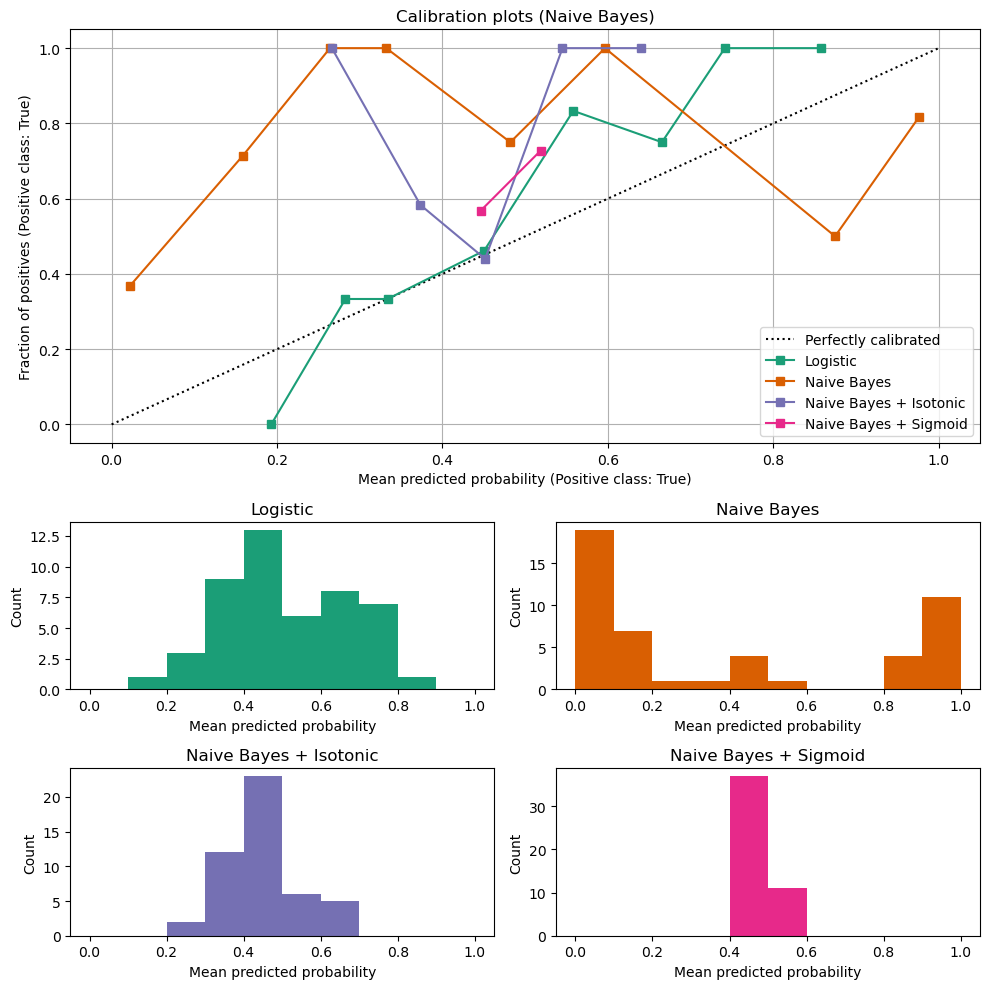

In [203]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [204]:
from collections import defaultdict

import pandas as pd

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    brier_score_loss,
    log_loss,
    roc_auc_score,
)

scores = defaultdict(list)
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    scores["Classifier"].append(name)

    for metric in [brier_score_loss, log_loss]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_prob[:, 1]))

    for metric in [precision_score, recall_score, f1_score, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_pred))

    score_df = pd.DataFrame(scores).set_index("Classifier")
    score_df.round(decimals=3)

score_df

/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Brier loss,Log loss,Precision,Recall,F1,Roc auc
Classifier,,,,,,
Logistic,0.189746,0.564542,0.863636,0.655172,0.745098,0.748639
Naive Bayes,0.330280,1.218524,0.750000,0.413793,0.533333,0.601633
Naive Bayes + Isotonic,0.251637,0.698312,1.000000,0.310345,0.473684,0.655172
Naive Bayes + Sigmoid,0.247934,0.688890,0.727273,0.275862,0.400000,0.558984


## part 2, SCV

In [205]:
import numpy as np

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output for binary classification."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0, 1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [206]:
lr = LogisticRegression(C=1.0)
svc = NaivelyCalibratedLinearSVC(max_iter=10_000)
svc_isotonic = CalibratedClassifierCV(svc, cv=2, method="isotonic")
svc_sigmoid = CalibratedClassifierCV(svc, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (svc, "SVC"),
    (svc_isotonic, "SVC + Isotonic"),
    (svc_sigmoid, "SVC + Sigmoid"),
]


/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn

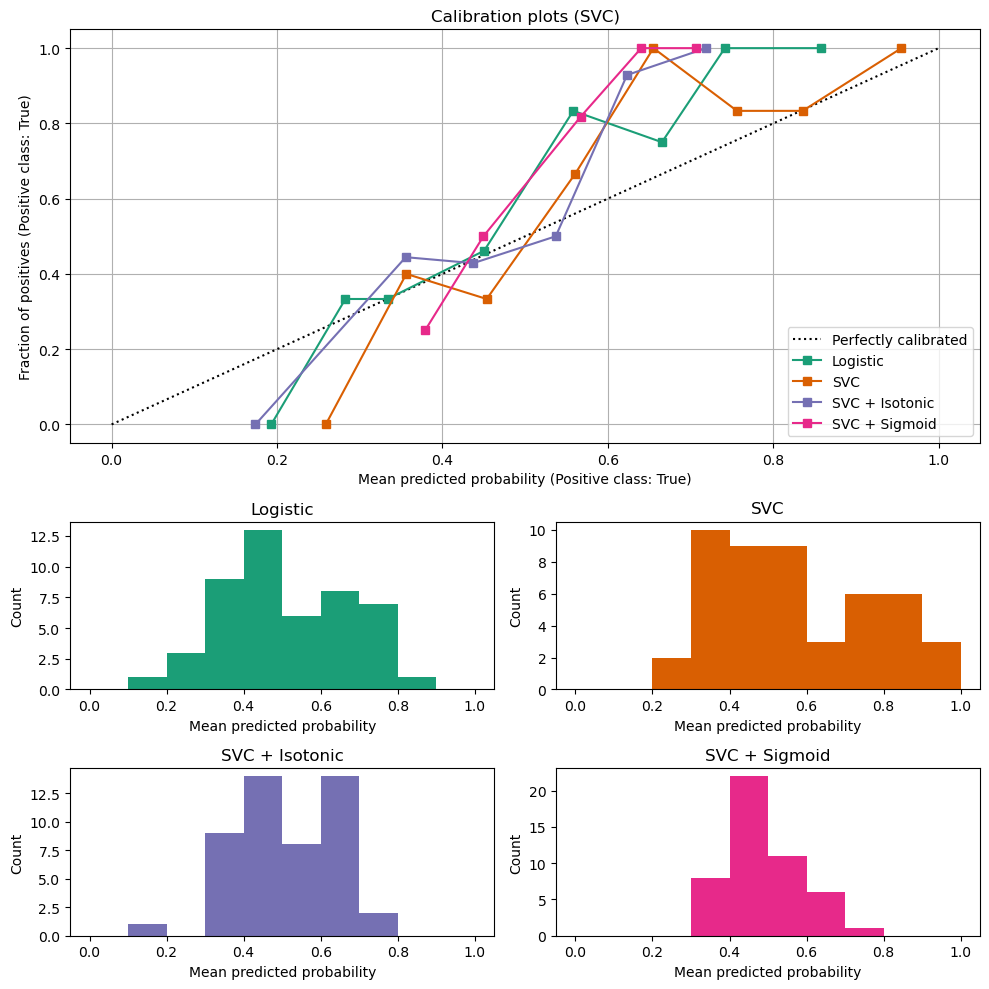

In [207]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (SVC)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [208]:
scores = defaultdict(list)
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    scores["Classifier"].append(name)

    for metric in [brier_score_loss, log_loss]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_prob[:, 1]))

    for metric in [precision_score, recall_score, f1_score, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_pred))

    score_df = pd.DataFrame(scores).set_index("Classifier")
    score_df.round(decimals=3)

score_df

/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/imilas/miniconda3/envs/madress/lib/python3.10/site-packages/sklearn

,Brier loss,Log loss,Precision,Recall,F1,Roc auc
Classifier,,,,,,
Logistic,0.189746,0.564542,0.863636,0.655172,0.745098,0.748639
SVC,0.180801,0.530968,0.617021,1.000000,0.763158,0.526316
SVC + Isotonic,0.207453,0.604792,0.894737,0.586207,0.708333,0.740472
SVC + Sigmoid,0.217239,0.626270,0.888889,0.551724,0.680851,0.723230
